# Research Question:

How do refugee populations change over time? 

How does the refugee population change in terms of demographics (where are the refugees coming from) and in sheer size? 

Are there differences in time frame? 

Are there certain groups of refugees who make up a larger proportion of total refugees over time?


To look at: 
- track number of refugees in Jordan, Lebanon, and Turkey from 2005 - 2019
  - we want to track from 2005 to witness how the country was dealing with refugees before witnessing a huge influx of individuals and after refugee/asylee numbers rapidly increased
  - these tables will help to identify when major changes in refugee/asylee populations took place in each country, and the extent to which they increased 
- track population make up of refugees over time for each country 

##Data sources:
- [UNHCR Statistics Portal](http://popstats.unhcr.org/en/time_series): For the Syrian Statistics Tables for Jordan, Lebanon, and Turkey, data is used from the United Nations High Commissoner for Refugees Statistics Portal time series data. 

- [Financial Tracking Service](https://fts.unocha.org/appeals/724/flows?fts_c=simple_property_4%2Cdirectional_property%2Cdirectional_property_1%2Cdirectional_property_3%2Csimple_property%2Cdirectional_property_2%2Csimple_property_1%2Csimple_property_2%2Csimple_property_3%2Cdirectional_property_4%2Cdirectional_property_8#block-system-main):
This data is used to track funding for the Syrian refugee crisis and funding to meet the requests of the UNHCR for the 3RP ([Syrian Refugee Response and Resiliancy Plan](http://reporting.unhcr.org/sites/default/files/Syria%203RP%20Regional%20Strategic%20Overview%202018-2019%20%28December%202017%29.pdf?v=2)). This specific data set shows funding from various sources, the destination organization, funding amount and status, destination country, and destination crisis.

- [Integrated Nettwork for Societal Conflict Research (INSCR)](http://www.systemicpeace.org/inscrdata.html):  This data is used to observe a time series of "Major Episodes of Political Violence, 1946-2017" with specific focus on the conflict in Syria. This can be used to see how major episodes of political violence correlates with refugee population changes in Jordan, Lebanon, and Turkey. 

## Sryian refugees in Jordan, Lebanon, and Turkey

This table represents the population of both refugees and asylum seekers coming from Syria and entering Jordan, Lebanon, and Turkey from 2005 - 2017. 

The data for the following tables was retrieved from the United Nations High Commissioner for Refugees Population Statistics portal [available here](http://popstats.unhcr.org/en/time_series).

*Note: this is the source used for Jordan, Lebanon, and Turkey*

*Another note: in each table, Value = Population size*


In [0]:
import pandas as pd

##Jordan

Syrian Statistics Table for Jordan

In [0]:
samplesyrianpop_jordan = pd.read_excel("syrianpop_jordan.xlsx")
#print(samplesyrianpop_jordan.sample(10))


In [0]:
print(samplesyrianpop_jordan.columns)
print(list(samplesyrianpop_jordan))


Index(['Year', 'Country / territory of asylum/residence', 'Origin',
       'Population type', 'Value'],
      dtype='object')
['Year', 'Country / territory of asylum/residence', 'Origin', 'Population type', 'Value']


###Jordan: 
Modified Syrian Statistics Table- Year,  Population type, Value

In [0]:
jordanstats = samplesyrianpop_jordan[["Year", "Country / territory of asylum/residence", "Population type", "Value"]]
#print(jordanstats)

In [0]:
jordanstats["year_type"]= jordanstats["Year"].apply(str) + "_" + jordanstats["Population type"]
#pd.DataFrame(jordanstats)

###Jordan Totals
Combining totals of refugees + asylum seekers for each year.
- Doing this because some years have multiple values; one value for refugees and one value for asylum seekers.

In [0]:
jordantotals = jordanstats.groupby("Year").sum()
print(jordantotals)

       Value
Year        
2005     105
2006      99
2007     101
2008     168
2009     282
2010     485
2011    2811
2012  239289
2013  585304
2014  623112
2015  628223
2016  648836
2017  653031


In [0]:
jordantotals["Country"] = "Jordan"
jordantotals["Years"] = jordantotals.index
jordantotals.rename(index = {"Year": "IndexYear"})

#pd.DataFrame(jordantotals)

,Value,Country,Years
Year,,,
2005,105,Jordan,2005
2006,99,Jordan,2006
2007,101,Jordan,2007
2008,168,Jordan,2008
2009,282,Jordan,2009
2010,485,Jordan,2010
2011,2811,Jordan,2011
2012,239289,Jordan,2012
2013,585304,Jordan,2013


##Lebanon Syrian Statistics
Population of refugees and asylum seekers from Syria per year in Lebanon.

In [0]:
samplesyrianpop_lebanon = pd.read_excel("syrianpop_lebanon.xlsx")
#print(samplesyrianpop_lebanon)

###Lebanon
Modified Syrian Statistics Table: Year, Country, Population Type, Value

In [0]:
lebanonstats = samplesyrianpop_lebanon[["Year", "Country / territory of asylum/residence", "Population type", "Value"]]
#print(lebanonstats)

In [0]:
lebanonstats["year_type"]= lebanonstats["Year"].apply(str) + "_" + lebanonstats["Population type"]
#print(lebanonstats)

###Lebanon Totals
Combined totals per year of refugees and asylum seekers.

In [0]:
lebanontotals = lebanonstats.groupby("Year").sum()
print(lebanontotals)

lebanontotals["Country"] = "Lebanon"
lebanontotals["Years"] = lebanontotals.index
lebanontotals.rename(index = {"Year": "IndexYear"})
#print(lebanontotals)

        Value
Year         
2006       24
2007       90
2008      150
2009      190
2010      205
2011      491
2012   127181
2013   851615
2014  1147911
2015  1062705
2016  1005513
2017   992135


,Value,Country,Years
Year,,,
2006,24,Lebanon,2006
2007,90,Lebanon,2007
2008,150,Lebanon,2008
2009,190,Lebanon,2009
2010,205,Lebanon,2010
2011,491,Lebanon,2011
2012,127181,Lebanon,2012
2013,851615,Lebanon,2013
2014,1147911,Lebanon,2014


###Combining Jordan and Lebanon Syrian Statistics Tables.

In [0]:
syrians_jd_lb = jordanstats.merge(lebanonstats, on="year_type", how="outer")
#pd.DataFrame(syrians_jd_lb)

###Combining Jordan and Lebanon totals tables:

In [0]:
totals_jd_lb = jordantotals.merge(lebanontotals, on="Years", how="outer")
#print(totals_jd_lb)

##Turkey
Syrian Statistics table for Turkey 

In [0]:
samplesyrianpop_turkey = pd.read_excel("syrianpop_turkey.xlsx")
print(samplesyrianpop_turkey)

    Year Country / territory of asylum/residence            Origin  \
0   2005                                  Turkey  Syrian Arab Rep.   
1   2005                                  Turkey  Syrian Arab Rep.   
2   2006                                  Turkey  Syrian Arab Rep.   
3   2006                                  Turkey  Syrian Arab Rep.   
4   2007                                  Turkey  Syrian Arab Rep.   
5   2007                                  Turkey  Syrian Arab Rep.   
6   2008                                  Turkey  Syrian Arab Rep.   
7   2008                                  Turkey  Syrian Arab Rep.   
8   2009                                  Turkey  Syrian Arab Rep.   
9   2009                                  Turkey  Syrian Arab Rep.   
10  2010                                  Turkey  Syrian Arab Rep.   
11  2010                                  Turkey  Syrian Arab Rep.   
12  2011                                  Turkey  Syrian Arab Rep.   
13  2011            

In [0]:
samplesyrianpop_turkey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
Year                                       26 non-null int64
Country / territory of asylum/residence    26 non-null object
Origin                                     26 non-null object
Population type                            26 non-null object
Value                                      26 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


###Turkey
Modified Syrian Statistics Table - Year, Country, Population type, Value

In [0]:
turkeystats = samplesyrianpop_turkey[["Year", "Country / territory of asylum/residence", "Population type", "Value"]]
pd.DataFrame(turkeystats)

,Year,Country / territory of asylum/residence,Population type,Value
0,2005,Turkey,Asylum-seekers,7
1,2005,Turkey,Refugees (incl. refugee-like situations),12
2,2006,Turkey,Asylum-seekers,5
3,2006,Turkey,Refugees (incl. refugee-like situations),2
4,2007,Turkey,Asylum-seekers,19
5,2007,Turkey,Refugees (incl. refugee-like situations),5
6,2008,Turkey,Asylum-seekers,21
7,2008,Turkey,Refugees (incl. refugee-like situations),12
8,2009,Turkey,Asylum-seekers,56
9,2009,Turkey,Refugees (incl. refugee-like situations),8


### Applying string data type for "year_type" variable

In [0]:
turkeystats["year_type"]= turkeystats["Year"].apply(str) + "_" + turkeystats["Population type"]
pd.DataFrame(turkeystats)

,Year,Country / territory of asylum/residence,Population type,Value,year_type
0,2005,Turkey,Asylum-seekers,7,2005_Asylum-seekers
1,2005,Turkey,Refugees (incl. refugee-like situations),12,2005_Refugees (incl. refugee-like situations)
2,2006,Turkey,Asylum-seekers,5,2006_Asylum-seekers
3,2006,Turkey,Refugees (incl. refugee-like situations),2,2006_Refugees (incl. refugee-like situations)
4,2007,Turkey,Asylum-seekers,19,2007_Asylum-seekers
5,2007,Turkey,Refugees (incl. refugee-like situations),5,2007_Refugees (incl. refugee-like situations)
6,2008,Turkey,Asylum-seekers,21,2008_Asylum-seekers
7,2008,Turkey,Refugees (incl. refugee-like situations),12,2008_Refugees (incl. refugee-like situations)
8,2009,Turkey,Asylum-seekers,56,2009_Asylum-seekers
9,2009,Turkey,Refugees (incl. refugee-like situations),8,2009_Refugees (incl. refugee-like situations)


###Turkey Totals
Combined totals for asylum seekers and refugees from Syria in Turkey per year.

In [0]:
turkeytotals = turkeystats.groupby("Year").sum()
print(turkeytotals)

turkeytotals["Country"] = "Turkey"
turkeytotals["Years"] = turkeytotals.index
pd.DataFrame(turkeytotals)

        Value
Year         
2005       19
2006        7
2007       24
2008       33
2009       64
2010       74
2011      224
2012   248666
2013   585711
2014  1558149
2015  2503846
2016  2824167
2017  3424400


,Value,Country,Years
Year,,,
2005,19,Turkey,2005
2006,7,Turkey,2006
2007,24,Turkey,2007
2008,33,Turkey,2008
2009,64,Turkey,2009
2010,74,Turkey,2010
2011,224,Turkey,2011
2012,248666,Turkey,2012
2013,585711,Turkey,2013


##Final Syrian Statistics Table:

Merging Syrian Statistics table of Jordan and Lebanon (already merged) with Turkey:

In [0]:
syrians_jd_lb_tk = syrians_jd_lb.merge(turkeystats, on="year_type", how="outer")
pd.DataFrame(syrians_jd_lb_tk)

,Year_x,Country / territory of asylum/residence_x,Population type_x,Value_x,year_type,Year_y,Country / territory of asylum/residence_y,Population type_y,Value_y,Year,Country / territory of asylum/residence,Population type,Value
0,2005.0,Jordan,Asylum-seekers,65.0,2005_Asylum-seekers,NaN,NaN,NaN,NaN,2005,Turkey,Asylum-seekers,7
1,2005.0,Jordan,Refugees (incl. refugee-like situations),40.0,2005_Refugees (incl. refugee-like situations),NaN,NaN,NaN,NaN,2005,Turkey,Refugees (incl. refugee-like situations),12
2,2006.0,Jordan,Asylum-seekers,57.0,2006_Asylum-seekers,2006.0,Lebanon,Asylum-seekers,18.0,2006,Turkey,Asylum-seekers,5
3,2006.0,Jordan,Refugees (incl. refugee-like situations),42.0,2006_Refugees (incl. refugee-like situations),2006.0,Lebanon,Refugees (incl. refugee-like situations),6.0,2006,Turkey,Refugees (incl. refugee-like situations),2
4,2007.0,Jordan,Asylum-seekers,60.0,2007_Asylum-seekers,2007.0,Lebanon,Asylum-seekers,42.0,2007,Turkey,Asylum-seekers,19
5,2007.0,Jordan,Refugees (incl. refugee-like situations),41.0,2007_Refugees (incl. refugee-like situations),2007.0,Lebanon,Refugees (incl. refugee-like situations),48.0,2007,Turkey,Refugees (incl. refugee-like situations),5
6,2008.0,Jordan,Asylum-seekers,124.0,2008_Asylum-seekers,2008.0,Lebanon,Asylum-seekers,66.0,2008,Turkey,Asylum-seekers,21
7,2008.0,Jordan,Refugees (incl. refugee-like situations),44.0,2008_Refugees (incl. refugee-like situations),2008.0,Lebanon,Refugees (incl. refugee-like situations),84.0,2008,Turkey,Refugees (incl. refugee-like situations),12
8,2009.0,Jordan,Asylum-seekers,144.0,2009_Asylum-seekers,2009.0,Lebanon,Asylum-seekers,100.0,2009,Turkey,Asylum-seekers,56
9,2009.0,Jordan,Refugees (incl. refugee-like situations),138.0,2009_Refugees (incl. refugee-like situations),2009.0,Lebanon,Refugees (incl. refugee-like situations),90.0,2009,Turkey,Refugees (incl. refugee-like situations),8


##Final Syrian Totals Table

Merging totals refugees + asylum seekers per year for Jordan, Lebanon (already merged), and Turkey:

In [0]:
totals_jd_lb_tk = turkeytotals.merge(totals_jd_lb, on="Years", how="outer")
pd.DataFrame(totals_jd_lb_tk)



,Value,Country,Years,Value_x,Country_x,Value_y,Country_y
0,19,Turkey,2005,105,Jordan,NaN,NaN
1,7,Turkey,2006,99,Jordan,24.0,Lebanon
2,24,Turkey,2007,101,Jordan,90.0,Lebanon
3,33,Turkey,2008,168,Jordan,150.0,Lebanon
4,64,Turkey,2009,282,Jordan,190.0,Lebanon
5,74,Turkey,2010,485,Jordan,205.0,Lebanon
6,224,Turkey,2011,2811,Jordan,491.0,Lebanon
7,248666,Turkey,2012,239289,Jordan,127181.0,Lebanon
8,585711,Turkey,2013,585304,Jordan,851615.0,Lebanon
9,1558149,Turkey,2014,623112,Jordan,1147911.0,Lebanon


### Making a new data frame to use for graphing

In [0]:
refugeetotals = pd.DataFrame([["2010",74,485,205,], ["2011",224,2811,491], ["2012",248666,239289,127181], ["2013",585711,585304,851615], ["2014", 1558149,623112,1147911], ["2015",2503846,628223,1062705], ["2016",2824167,648836,1005513], ["2017",3424400,653031,992135]], columns=["Year", "Turkey", "Jordan","Lebanon"])
refugeetotals['Total Pop'] = refugeetotals.sum(axis=1)
pd.DataFrame(refugeetotals)

#refugeetotals.to_csv('refugeetotals.csv')

,Year,Turkey,Jordan,Lebanon,Total Pop
0,2010,74,485,205,764
1,2011,224,2811,491,3526
2,2012,248666,239289,127181,615136
3,2013,585711,585304,851615,2022630
4,2014,1558149,623112,1147911,3329172
5,2015,2503846,628223,1062705,4194774
6,2016,2824167,648836,1005513,4478516
7,2017,3424400,653031,992135,5069566


### Making a graph of refugee totals per country

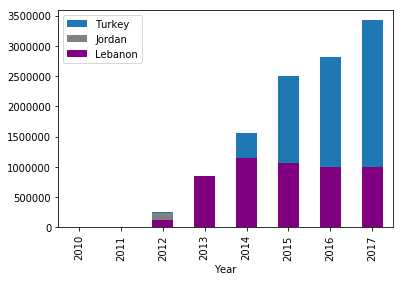

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
ax = plt.gca()
refugeetotals.plot(kind='bar',x='Year',y='Turkey',ax=ax)
refugeetotals.plot(kind='bar',x='Year',y='Jordan', color='grey', ax=ax)
refugeetotals.plot(kind='bar',x='Year',y='Lebanon', color='purple', ax=ax)
plt.show()

plt.savefig('refugeepop.png')

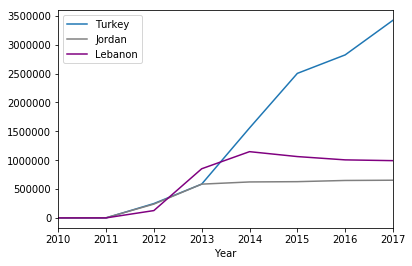

In [0]:
ax = plt.gca()
refugeetotals.plot(kind='line',x='Year',y='Turkey',ax=ax)
refugeetotals.plot(kind='line',x='Year',y='Jordan', color='grey', ax=ax)
refugeetotals.plot(kind='line',x='Year',y='Lebanon', color='purple', ax=ax)
plt.show()

###Just Turkey:

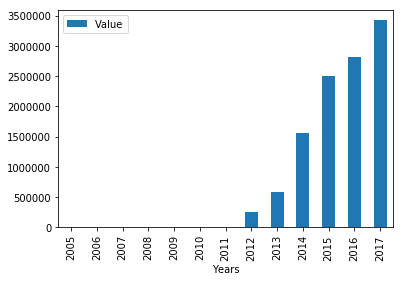

In [0]:
import matplotlib.pyplot as plt
ax = plt.gca()
turkeytotals.plot(kind='bar',x='Years',y='Value',ax=ax)


plt.show()


## Internally Displaced Syrian Population
This data is available from the UNHCR Population Statistics Timeseries [here](http://popstats.unhcr.org/en/time_series)

Not only is it important to look at individuals leaving Syria as refugees, but also those who are internally displaced in Syria.

 

In [0]:
sample_syrian_displacement = pd.read_excel("UNHCRsyrian_displacement.xlsx")
print(sample_syrian_displacement)

pd.DataFrame(list(sample_syrian_displacement))

   Year Country / territory of asylum/residence            Origin  \
0  2012                        Syrian Arab Rep.  Syrian Arab Rep.   
1  2013                        Syrian Arab Rep.  Syrian Arab Rep.   
2  2014                        Syrian Arab Rep.  Syrian Arab Rep.   
3  2015                        Syrian Arab Rep.  Syrian Arab Rep.   
4  2016                        Syrian Arab Rep.  Syrian Arab Rep.   
5  2017                        Syrian Arab Rep.  Syrian Arab Rep.   

   Refugees (incl. refugee-like situations)  Asylum-seekers (pending cases)  \
0                                       NaN                             NaN   
1                                       NaN                             NaN   
2                                       NaN                             NaN   
3                                       NaN                             NaN   
4                                       NaN                             NaN   
5                                       Na

,0
0,Year
1,Country / territory of asylum/residence
2,Origin
3,Refugees (incl. refugee-like situations)
4,Asylum-seekers (pending cases)
5,Returned refugees
6,Internally displaced persons (IDPs)
7,Returned IDPs
8,Stateless persons
9,Others of concern


### Cleaning data for desired variables

In [0]:
syrian_displacement = sample_syrian_displacement[['Year', 'Returned refugees', 'Internally displaced persons (IDPs)', 'Returned IDPs', 'Total Population']]
pd.DataFrame(syrian_displacement)

,Year,Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Total Population
0,2012,NaN,2016500,NaN,2016500
1,2013,NaN,6520800,NaN,6520800
2,2014,NaN,7632500,NaN,7632500
3,2015,NaN,6563462,NaN,6563462
4,2016,NaN,6325978,600000.0,6925978
5,2017,77212.0,6150005,597152.0,6824369


In [0]:
syrian_displacement.to_csv("syriaIDP.csv")

###Visualizing Syrian internal displacement:

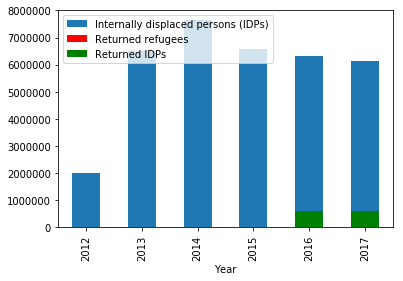

In [0]:
ax = plt.gca()
syrian_displacement.plot(kind='bar',x='Year',y='Internally displaced persons (IDPs)',ax=ax)
syrian_displacement.plot(kind='bar',x='Year',y='Returned refugees', color='red', ax=ax)
syrian_displacement.plot(kind='bar',x='Year',y='Returned IDPs', color='green', ax=ax)

plt.show()

In [0]:
#plt.savefig('syriaIDP.png')

<Figure size 432x288 with 0 Axes>

## Registered Refugees
This data was retrieved from UNHCR [portal](https://data2.unhcr.org/en/situations/syria) for Syria. The data is from the section titled "Trend of Registered Syrian Refugees" and the .csv was downloaded. 

In [0]:
registered_refugees_sample = pd.read_excel("UNHCR_registered_refugees.xlsx")
pd.DataFrame(registered_refugees_sample.sample(10))

,data_date,individuals
369,2014-03-10,2541072
564,2014-11-04,3212157
709,2015-08-23,3984229
244,2013-10-11,2124650
487,2014-07-26,2906146
281,2013-11-25,2234841
812,2017-08-20,5164023
248,2013-10-17,2132275
693,2015-05-21,3953165
278,2013-11-20,2232207


In [0]:
registered_refugees_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
data_date      925 non-null datetime64[ns]
individuals    925 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.5 KB


### Changing the dates to sow the time frame of the Syrian Civil War

In [0]:
import datetime

registered_syrians = registered_refugees_sample[(registered_refugees_sample["data_date"]>datetime.date(2010,1,1))]
pd.DataFrame(registered_syrians.sample(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


,data_date,individuals
881,2018-09-04,5611991
478,2014-07-15,2892889
526,2014-09-11,2997693
26,2013-02-03,346589
771,2016-10-19,4768844
82,2013-04-05,1285031
826,2017-11-05,5342902
553,2014-10-16,3181046
333,2014-01-27,2417323
23,2013-01-30,342192


### Adding a year column 

In [0]:
registered_syrians["Year"]=registered_syrians["data_date"].map(lambda x: x.year)
pd.DataFrame(registered_syrians.sample(10))

,data_date,individuals,Year
812,2017-08-20,5164023,2017
831,2017-12-07,5436587,2017
322,2014-01-14,2365618,2014
397,2014-04-12,2640090,2014
63,2013-03-15,839914,2013
476,2014-07-13,2893843,2014
289,2013-12-05,2271149,2013
766,2016-09-03,4766743,2016
447,2014-06-09,2828532,2014
85,2013-04-08,1295894,2013


In [0]:
registered_syrians.to_csv("registered_syrians_clean.csv")